# STAT201 Group Project Report
# Parent's Educational Attainment and Children's Intellectual Development

*Jack Yao, Jessie Lu, Kexin Feng, Vincent Luong*

### Sections
- ##### [Introduction](#intro)
- ##### [Preliminary Analysis](#prelim)
- ##### [Further Analysis and Results](#further)
- ##### [Discussion](#discuss)
- ##### [References](#refer)


# Introduction <a id = 'intro'>
Student Performance is a general term used to describe how well a student has mastered what is taught in school. In our experiment, we will use students' grades to quantify student performance and ultimately intellect. Although countless factors contribute to a student's academic performance, for simplicity we will assume performance on mathematics is representative of the student's performance; a study published in 2019 [(Mammarella et al., 2019)](#ref_2) explores the impact of parents' attitudes and behaviors towards math on their child's mathematic performance. There was evidence that parents majoring in elementary education tend to have higher math anxiety than those attending college. Another study [(Muhammad et al., 2020)](#ref_3) also suggests that the high education of father and mother positively contributes to their children's academic achievement. Our research is inspired by these findings, aiming to investigate the relationship between parental education and the child's mathematic performance.

The dataset [(2014)](#ref_1) that will be used in this project is the Student Performance on Math dataset from the UCI machine learning repository. This project will conduct a hypothesis test to determine whether the difference between the mean (mathematic) student performance of "well-educated" and "less-educated" parents is statistically significant. The classification of parents’ level of education is determined in the preliminary analysis. The measured student performance is reflected in grades on a numeric scale from $0$ to $20$. 

### Research Question:
Is the mean (mathematic) student performance of those with well-educated parents greater than that of those with less-education parents?

$H_0: \mu_1 - \mu_2 = 0$

$H_a: \mu_1 - \mu_2 > 0$

$\mu_1$: Student performance of well-educated parents’ group.

$\mu_2$: Student performance of less-educated parents’ group. 

The hypothesis test will be conducted at a significance level of $\alpha = 1\%$.

# Preliminary Analysis <a id = 'prelim'>
This section will involve:
- Reading data from UCI database
- Wrangling, analyzing, and plotting relevant data
    - [Classifying parents' education](#parents)
    - [Wrangling student's grades](#students)
- Computing point estimates

In [1]:
# load libraries and set seed
set.seed(8888)
library(tidyverse)
library(tidymodels)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

### Reading and cleaning data from database

In [2]:
# Reading data from UCI Machine Learning Repository and extract CSV file from zip file
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
download.file(url, "./data/studentperformance.zip")
raw_data <- unzip("./data/studentperformance.zip", "student.zip", exdir = "./data") |>
    unzip("student-mat.csv", exdir = "./data") |>
    read_delim(delim = ";")

# Refactoring column names
student_data <- raw_data |>
    select(Medu, Fedu, G1, G2, G3)
colnames(student_data) <- c("mother_education", "father_education", "term_1_grade", "term_2_grade", "final_grade")

cat("[Table 1] Clean Student Data")
head(student_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[Table 1] Clean Student Data

mother_education,father_education,term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4,5,6,6
1,1,5,5,6
1,1,7,8,10
4,2,15,14,15
3,3,6,10,10
4,3,15,15,15


### Wrangling, analyzing, and plotting data

#### Classifying parents' education <a id='parents'></a>

Seen from documentation of the dataset [(2014)](#ref_1), the mother's and father's education levels are as follows:

[Table 2] Education Level Explanation
|Score|Education level|
|-|-|
|$0$|None|
|$1$|up to 4th grade|
|$2$|5th to 9th grade|
|$3$|Secondary education|
|$4$|Postsecondary education|


Below are plots of the distribution of the parents' education scores by assuming the score as numeric rather than categorical:

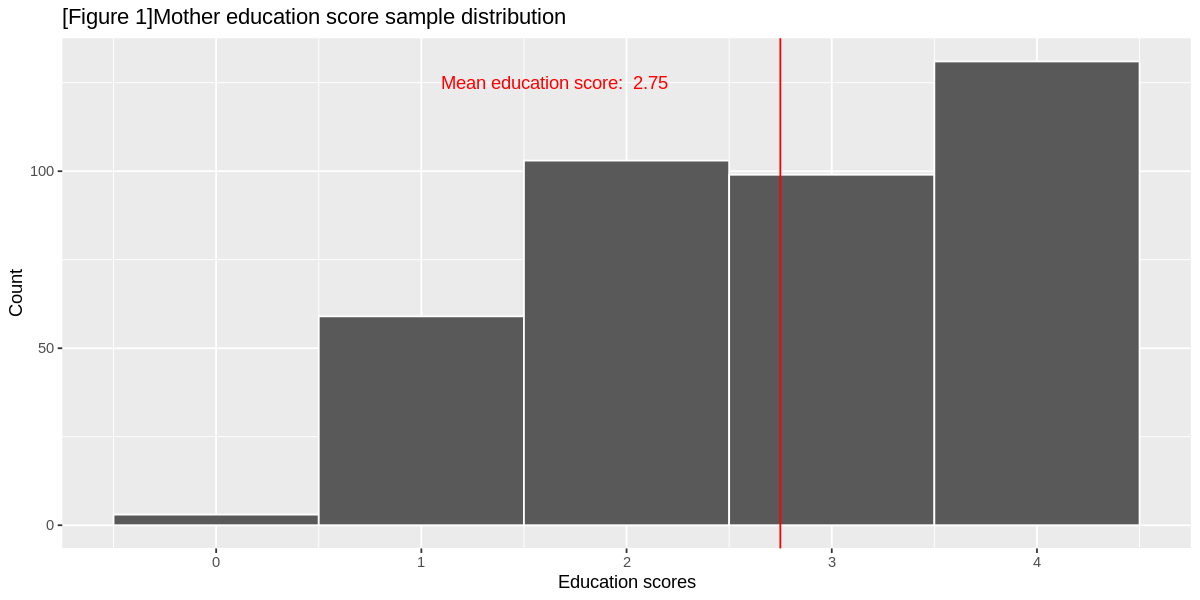

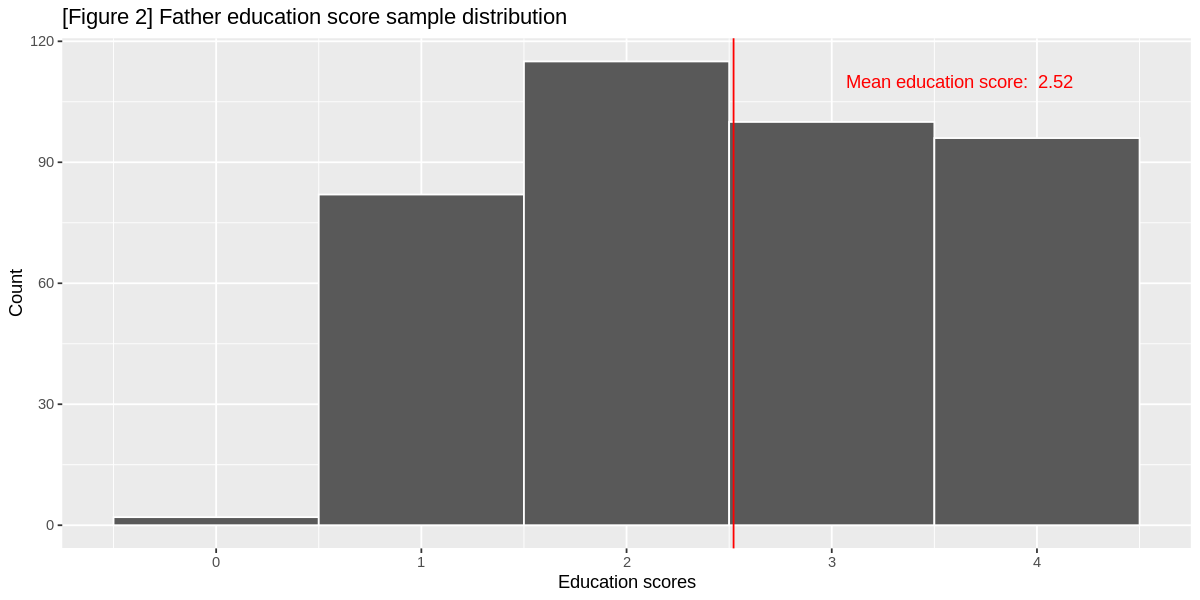

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5)

# Plot education scores of mothers
mother_education_plot <- student_data |>
    ggplot(aes(x = mother_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(mother_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$mother_education), digits = 2)), 
             x = mean(student_data$mother_education) - 1.1, y = 125, color = 'red') +
    ggtitle("[Figure 1]Mother education score sample distribution") +
    xlab("Education scores") +
    ylab("Count") +
    labs()

# Plot educations scores of fathers
father_education_plot <- student_data |>
    ggplot(aes(x = father_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(father_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data$father_education), digits = 2)), 
             x = mean(student_data$father_education) + 1.1, y = 110, color = 'red') +
    ggtitle("[Figure 2] Father education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

mother_education_plot
father_education_plot

From the plots above, it can be observed that they differ slightly in the shape, but otherwise share similar characteristics; there are very little observations of parents with "no education level" and most of the observations tend towards the upper end with both centers about the score of $2.6$.

With consideration of the fact that they share similar centers, the education scores of the respective parents are summed under the assumption that the individual parent education scores along with the sex of the parent are not respectively significant (e.g. father and mother with score of $5$ and $5$ vs. $1$ and $9$ vs. $9$ and $1$ are equivalent). Under this assumption, the process of classifying "well-educated" and "less-educated" parents is simplified and more generalized without further research beyond the scope of statistics.

Below is the distribution of the combined parents education scores:

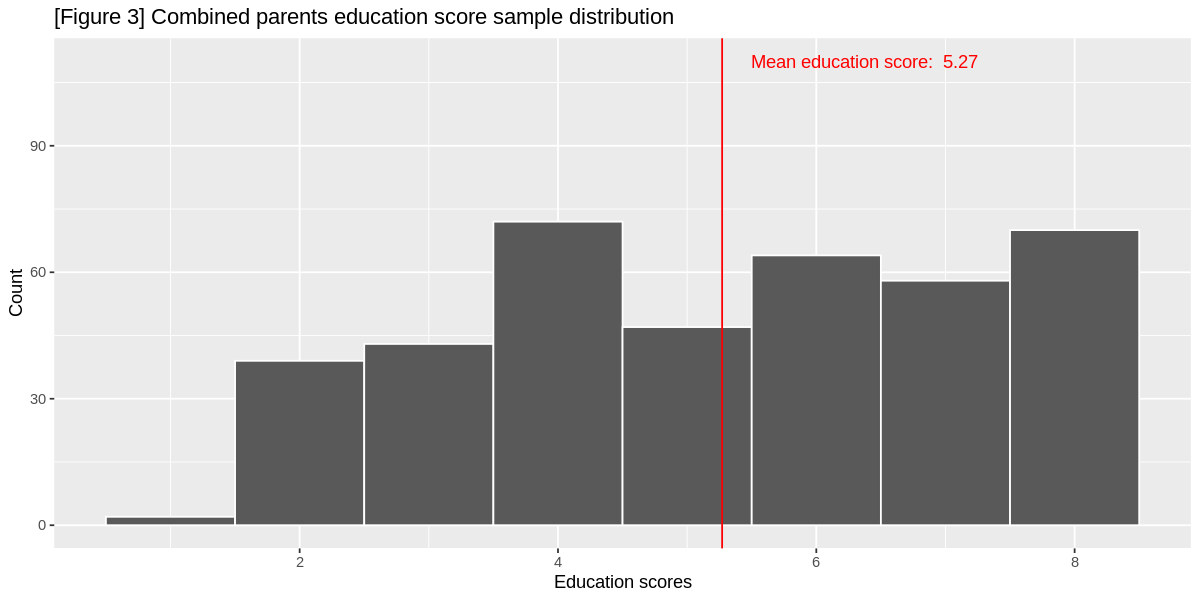

In [4]:
# Combine parents education scores
student_data_combined_edu <- student_data |>
    mutate(combined_education = father_education + mother_education)

# Plot combined education scores
combined_education_plot <- student_data_combined_edu |>
    ggplot(aes(x = combined_education)) +
    geom_histogram(binwidth = 1, color = 'white') +
    geom_vline(aes(xintercept = mean(combined_education)), color = 'red') +
    annotate("text", label = paste("Mean education score: ", round(mean(student_data_combined_edu$combined_education), digits = 2)), 
             x = mean(student_data_combined_edu$combined_education) + 1.1, y = 110, color = 'red') +
    ggtitle("[Figure 3] Combined parents education score sample distribution") +
    xlab("Education scores") +
    ylab("Count")

combined_education_plot

Without additional context from the data, it is unreasonable to assume any educational standards, e.g. "high school should be the minimum education". Therefore, to avoid further assumptions about the educational standards of this data's origin, the description representing each score will be disregarded and the scores will be solely treated as numeric values. As such, the parents' education would then be classified by splitting at the median to obtain a roughly equal split. Although the median may not be the only way to split and classify, it avoids most assumptions about the extent of "well-educated" and is a more generalizable approach.

In [5]:
# Find median value
split <- quantile(student_data_combined_edu$combined_education, 0.5)

# Split and classify
student_data_classified_edu <- student_data_combined_edu |>
    mutate(parents_education = ifelse(combined_education <= split, "less", "well")) |>
    select(term_1_grade, term_2_grade, final_grade, parents_education)

# Overview of split groups
cat("[Table 3] Count for Each Group")
student_data_classified_edu |>
    group_by(parents_education) |>
    summarize(n = n())


[Table 3] Count for Each Group

parents_education,n
<chr>,<int>
less,203
well,192


#### Wrangling student's grades <a id='students'></a>

Referring again to the documentation [(1)](#ref_1), the all three of a student's grades are integers in the interval $[0, 20]$.
Below are plots of the distribution of students' first, second, and final grades:

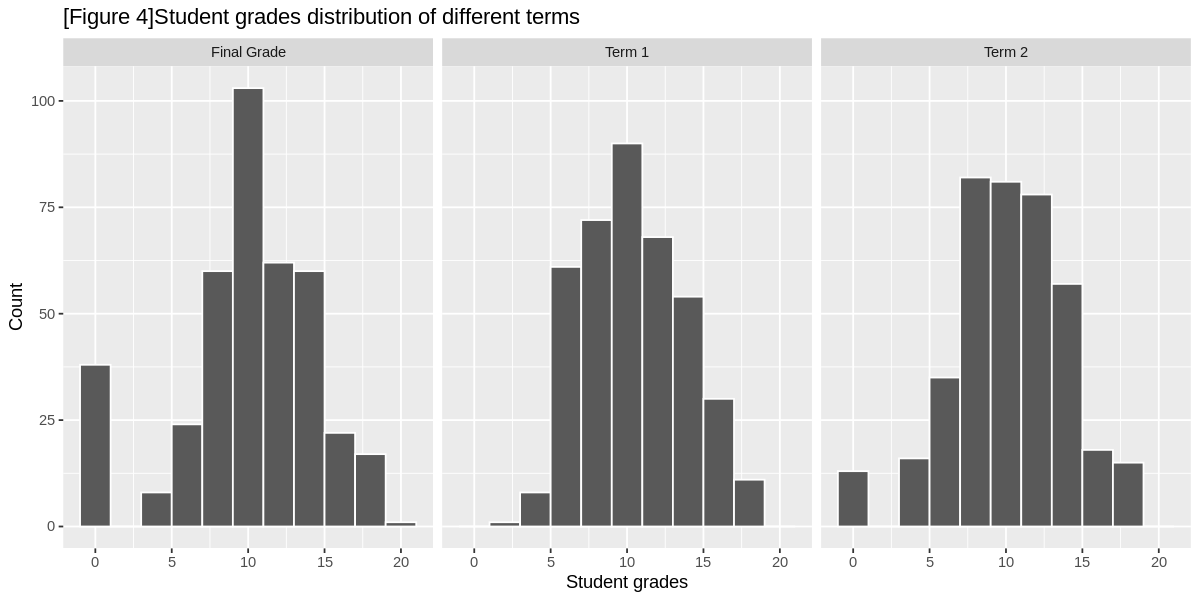

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)

# Plot all three grades
labels = c(`term_1_grade` = "Term 1", `term_2_grade` = "Term 2", `final_grade` = "Final Grade")

student_grade_plots <- student_data_classified_edu |>
    pivot_longer(names_to = "term", values_to = "grade", cols = c(term_1_grade, term_2_grade, final_grade)) |>
    ggplot(aes(x = grade)) +
    facet_wrap(vars(term), labeller = as_labeller(labels)) +
    geom_histogram(binwidth = 2, color = 'white') +
    ggtitle("[Figure 4]Student grades distribution of different terms") +
    xlab("Student grades") +
    ylab("Count")

student_grade_plots

Seen from the three plots above, it seems that most of the distributions seem relatively normal with center around $10$. However, looking at `Final Grade` and `Term 2`, there appears to be an increasing frequency for grades of $0$. Below is an overview of those with a final grade of $0$:

In [7]:
# Observe students with a final grade of 0
cat("[Table 4] Zero Final Grade Overview")
student_data_classified_edu |>
    filter(final_grade == 0) |>
    mutate(average_term_grades = (term_1_grade + term_2_grade)/2) |>
    select(term_1_grade, term_2_grade, final_grade) |>
    head(10)

[Table 4] Zero Final Grade Overview

term_1_grade,term_2_grade,final_grade
<dbl>,<dbl>,<dbl>
7,4,0
12,0,0
8,0,0
9,0,0
11,0,0
10,0,0
4,0,0
7,9,0
5,0,0


Observing the overview, it can be seen that those with a final grade of $0$ tend to also have "relatively poorer" grades in the preceding two terms. As the significance of $0$ wasn't documented in the original data, it's difficult to determine whether it represents missing/null data or other holistic factor such as failing by not reaching a certain cutoff. Due to this uncertainty, the mean of all three grades will be used to represents the student's grade to mitigate severe skewness. Below is the distribution of the final grades and the mean grades of students:

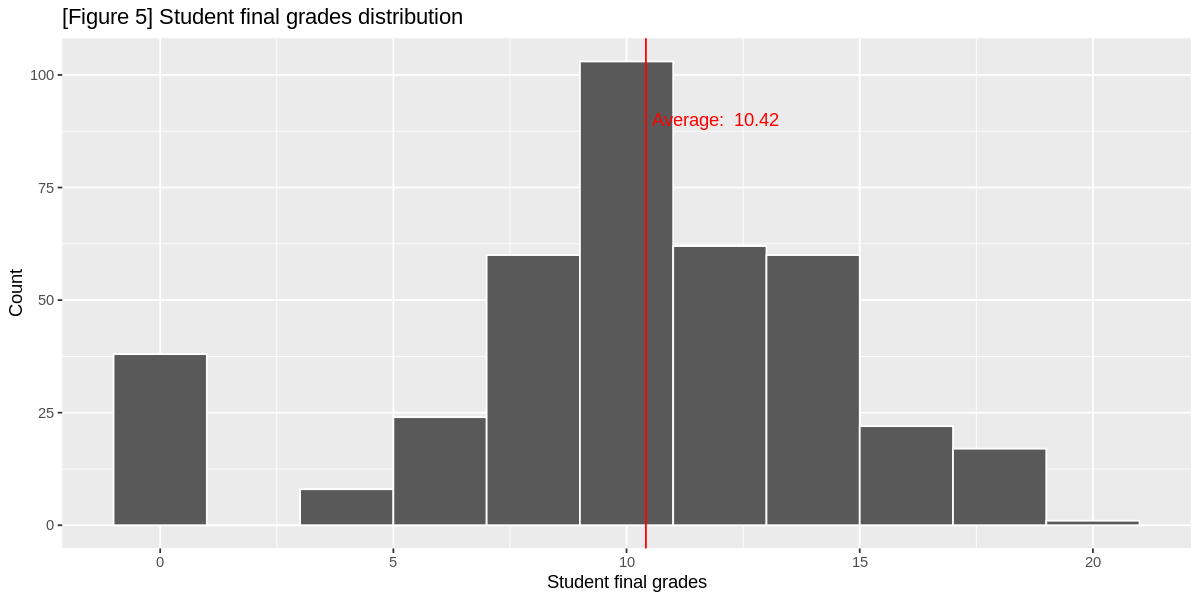

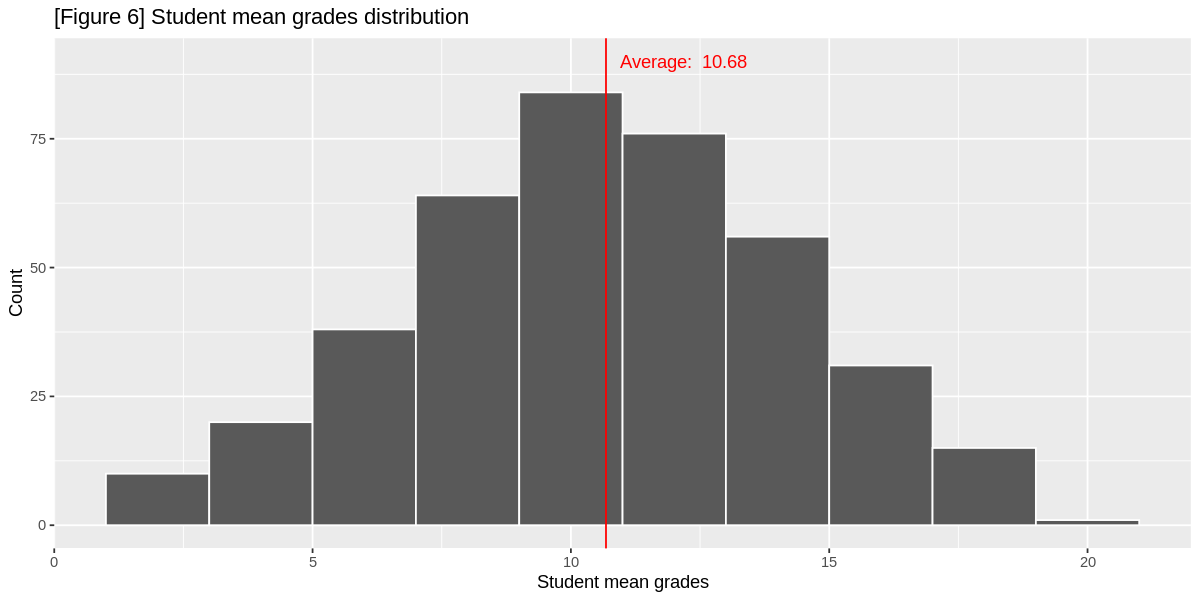

In [8]:
# Plot final grades only
student_final_grade_plot <- student_data_classified_edu |>
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(final_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(student_data_classified_edu$final_grade), digits = 2)), 
             x = mean(student_data_classified_edu$final_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("[Figure 5] Student final grades distribution") +
    xlab("Student final grades") +
    ylab("Count")

student_final_grade_plot

# Find average grades, plot, and compare to plot above
student_data_final <- student_data_classified_edu |>
    mutate(average_grade = (term_1_grade + term_2_grade + final_grade) / 3) |>
    select(average_grade, parents_education)

student_average_grade_plot <- student_data_final |>
    ggplot(aes(x = average_grade)) +
    geom_histogram(binwidth = 2, color = 'white') +
    geom_vline(aes(xintercept = mean(average_grade)), color = 'red') +
    annotate("text", label = paste("Average: ", round(mean(student_data_final$average_grade), digits = 2)), 
             x = mean(student_data_final$average_grade) + 1.5, y = 90, color = 'red') +
    ggtitle("[Figure 6] Student mean grades distribution") +
    xlab("Student mean grades") +
    ylab("Count")

student_average_grade_plot

Comparing the two distributions seen above, both centers seems to be similar while the mean grades does not appear to have any outliers. In addition, the range appears very similar, about $20$. Due to the absence of outliers (i.e. the $0$ data), it is reasonable to continue the analysis by using the average grade to avoid further assumptions.

# Further analysis and results <a id='further'>

### Preliminary  Information

~~- It is not statistically correct to assume that post-secondary is the educational standard in this data, therefore, we wanted to analyze the distributions of average education level to determine our basis for what counts as a high-education.  As measured in the preliminary results above, we received that the average education level of a parent is approximate $2.6$ (for both father and mother), so using the $\geq 6$ as a basis would consider both parents that have received secondary education or higher (slightly above-average education), as **well-educated**.~~

- Analyzing our dataset, we found our students to have been sampled from 2 different schools, so it should be mentioned that there could be some potential bias from schools for the `average_term_grade` of students that can skew our results, however, our goal is to test parental education levels and whether it affects the student's performance in mathematics and not to consider the outside education environment within these factors.  Therefore in our project, it is assumed that both schools provide the same education level (even though it can be a major factor in determining student performance).  

- The population standard deviation is not known in this student dataset, therefore we be approximating the population's standard deviation by using the sample's standard deviation.

### Expectations/Impacts/Future Questions.
 
 Through statistical analysis and inference, we expect to find if there exists sufficient evidence to prove/disprove whether the parent's (combined) education level plays a critical role in a student's performance in mathematics, which will lead to a better understanding in the social dynamic of a family.  The importance of parental education and its effect on a child's intellectual development for other subjects will be questioned.  Questions of should more/less parent's be seeking higher education and what will better help a child's intellectual development will arise.


### Bootstrap-based Hypothesis Test

Below is the hypothesis test conducted with a bootstrap-based approach

[Table 5] P-Value for Bootstrap-based Null Model

p_value
<dbl>
5e-04


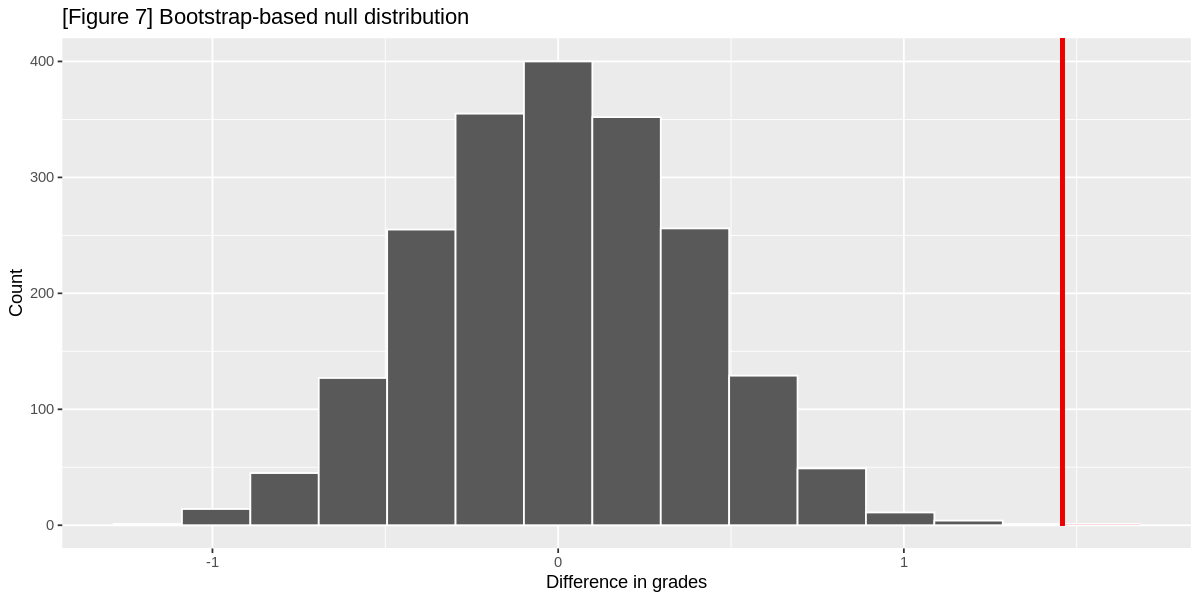

In [9]:
# Calculate observed test statistic
obs_stat <- student_data_final |>
    specify(average_grade ~ parents_education) |>
    calculate(stat = "diff in means", order = c("well", "less"))

# Generate null model
null_model_boot <- specify(student_data_final, formula = average_grade ~ parents_education) |>
    hypothesize(null = "independence") |>
    generate(type = "permute", reps = 2000) |>
    calculate(stat = "diff in means", order = c("well", "less"))

# Visualize
null_model_boot |> visualize() + 
    shade_p_value(obs_stat, direction = "greater", size = 1) +
    ggtitle("[Figure 7] Bootstrap-based null distribution") +
    xlab("Difference in grades") +
    ylab("Count")

# Output p-value
cat("[Table 5] P-Value for Bootstrap-based Null Model")
get_p_value(null_model_boot, obs_stat, direction = "greater")

Given that the p-value is less than our significance level set for our hypothesis test in [introduction](#intro), there is sufficient evidence to reject the null hypothesis $H_0$.

The obtained p-value from the bootstrap hypothesis test stands as a notable indicator of the significant variance in math performance. Utilizing the assumption of normality in a theoretical test such as the t-test could futher validation efforts. Initial bootstrapping outcomes, derived from the sampling distribution, already point towards normality. Our representative sample, sourced from the UCI machine learning repository, reinforces the external validity. Acknowledging both the assumption of normality and the sample's representativeness, we have opted to employ an additional theoretical-based approach in our analysis, aiming to delve deeper into our findings.

### Asymptotic Theory Based Hypothesis Test

Approaching the hypothesis test asymptotically, we want to first assume that the sampling distribution of mean average grades for the population is normal. 

below is the hypothesis test conducted with an asymptotic-based approach

[Table 6] Test Statistics for less-educated Group

n,mean,sd
<int>,<dbl>,<dbl>
203,9.970443,3.544345


[Table 7] Test Statistics for well-educated Group

n,mean,sd
<int>,<dbl>,<dbl>
192,11.42882,3.7157


[Table 8] P-Value for Theory-based Null Model

p_value
<dbl>
3.995373e-05


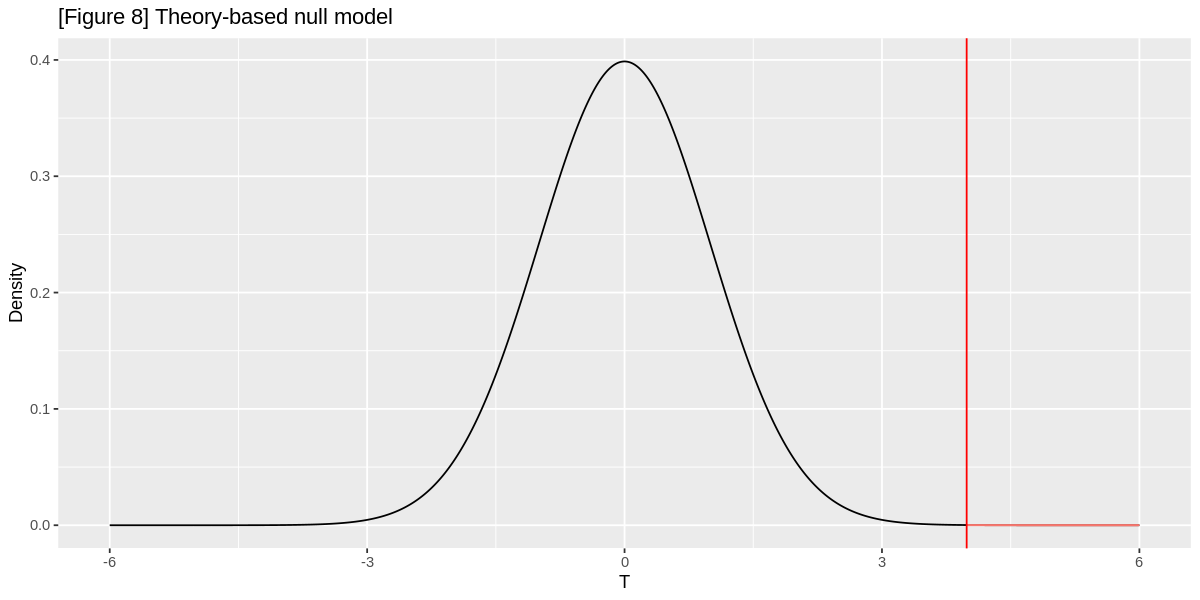

In [10]:
# Find statistics of student grades of "less-educated" and "well-educated" parents
less_stat <- student_data_final |>
    filter(parents_education == "less") |>
    summarize(n = n(), mean = mean(average_grade), sd = sd(average_grade))

well_stat <- student_data_final |>
    filter(parents_education == "well") |>
    summarize(n = n(), mean = mean(average_grade), sd = sd(average_grade))

cat("[Table 6] Test Statistics for less-educated Group")
less_stat
cat("[Table 7] Test Statistics for well-educated Group")
well_stat

# Calculate the degree of freedom for null model
df <- (less_stat$sd^2 / less_stat$n + well_stat$sd^2 / well_stat$n)^2 / (less_stat$sd^4 / (less_stat$n^2 * (less_stat$n - 1)) + well_stat$sd^4 / (well_stat$n^2 * (well_stat$n - 1)))

plot_range <- tibble(lower = -6, upper = 6)

# Generate null model
null_model_theory <- tibble(t = seq(from = plot_range$lower, to = plot_range$upper, by = 0.01), density = dt(t, df))

# Calculate test statistic
test_stat <- (well_stat$mean - less_stat$mean)/sqrt(well_stat$sd^2/well_stat$n + less_stat$sd^2/less_stat$n)

# Plot null model
ggplot(null_model_theory) + 
    geom_line(aes(x = t, y = density)) + 
    geom_ribbon(data = subset(null_model_theory, t > test_stat & t < plot_range$upper), mapping = aes(x = t, ymax = density, fill = "red", color = "red"), ymin = 0, alpha = 0.3) +
    geom_vline(aes(xintercept = test_stat), color = 'red') +
    theme(legend.position="none") +
    ggtitle("[Figure 8] Theory-based null model") +
    xlab("T") +
    ylab("Density")
    

# Output p-value
cat("[Table 8] P-Value for Theory-based Null Model")
tibble(p_value = pt(test_stat, df, lower.tail = F))


#### P-value interpration

With a p-value lower than 0.01, we can reject the null hypothesis.

#### Conclusion Interpretation

at a significance level of $\alpha = 1\%$, we can conclude that mean student performance of those with well-educated parents are greater than those with less-education parents


^
basic interpretation

# Discussion <a id='discuss'>

duiscussion here
    
    notes for possible discussion after we go over with ta
    - bootstrap results
    - asymptotic-based results
    - compare our intial predictions with our end results
    - discuss whether there were any variables that werent accounted for (e.g. parental salary for more supplies, etc.)
    - Discuss future quetsions/research

# References <a id='refer'>

1. <a id='ref_1'></a> Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

2. <a id='ref_2'></a> Herts, J. B., Beilock, S. L., & Levine, S. C. (2019). The role of parents’ and teachers’ math anxiety in Children’s math learning and attitudes. In I. C. Mammarella, S. Caviola & A. Dowker (Eds.), *Mathematics anxiety* (1st ed., pp. 190-210). Routledge. https://doi.org/10.4324/9780429199981-11

3. <a id='ref_3'></a> Dr. Muhammad Idris, Dr. Sajjad Hussain, & Dr. Nasir Ahmad. (2020). Relationship between Parents’ Education and their children’s Academic Achievement. Journal of Arts & Social Sciences , 7(2), 82-92. https://doi.org/10.46662/jass-vol7-iss2-2020(82-92)